In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [607]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [608]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [609]:
drop_features = ['PassengerId','Survived']
train_drop = train.drop(drop_features,axis=1)
train_drop.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [610]:
train_drop.dtypes.sort_values()

Pclass        int64
SibSp         int64
Parch         int64
Age         float64
Fare        float64
Name         object
Sex          object
Ticket       object
Cabin        object
Embarked     object
dtype: object

In [611]:
train_drop.select_dtypes(include='int64').head()

,Pclass,SibSp,Parch
0,3,1,0
1,1,1,0
2,3,0,0
3,1,1,0
4,3,0,0


In [612]:
train_drop.select_dtypes(include='float64').head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [613]:
train_drop.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [614]:
train.isnull().sum()[lambda x: x>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [615]:
test.isnull().sum()[lambda x: x>0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [616]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [617]:
titanic = pd.concat([train,test],sort=False)
len_train = train.shape[0]

In [618]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [619]:
len_train==891

True

In [620]:
titanic['Title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [621]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [622]:
titanic.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Dona              1
Jonkheer          1
Mme               1
Sir               1
the Countess      1
Lady              1
Don               1
Capt              1
Name: Title, dtype: int64

In [623]:
other_list = titanic.Title.value_counts().index[4:].tolist()
mapping={}
for s in other_list:
    mapping[s]='Rare'
titanic['Title'] = titanic['Title'].map(lambda x: mapping[x] if x in mapping else x)

In [624]:
grouped = titanic.groupby(['Title'])
median = grouped.Age.median()
median

Title
Master     4.0
Miss      22.0
Mr        29.0
Mrs       35.5
Rare      44.5
Name: Age, dtype: float64

In [625]:
def new_age(cols):
    age = cols[0]
    title = cols[1]
    if pd.isnull(age):
        return median[title]
    return age
titanic.Age = titanic[['Age','Title']].apply(new_age,axis=1)

In [626]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


D:\devenv\Anaconda3\envs\kaggleenv\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


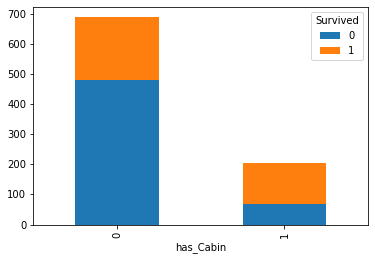

In [627]:
titanic['has_Cabin'] = 0
titanic['has_Cabin'].loc[~titanic.Cabin.isnull()]=1
titanic['has_Cabin'].loc[titanic.Cabin.isnull()]=0
pd.crosstab(titanic.has_Cabin[:len_train],train.Survived).plot.bar(stacked=True)

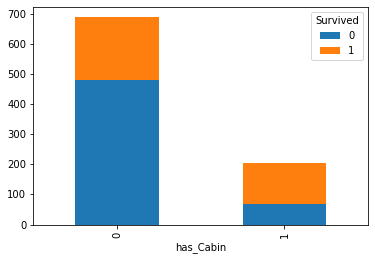

In [628]:
pd.crosstab(titanic.has_Cabin[:len_train],train.Survived).plot.bar(stacked=True)

In [629]:
titanic.Cabin = titanic.Cabin.fillna('U')
titanic[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,has_Cabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,0
5,6,0.0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,U,Q,Mr,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S,Master,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U,S,Mrs,0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U,C,Mrs,0


In [630]:
most_embarked = titanic.Embarked.value_counts().index[0]
titanic.Embarked = titanic.Embarked.fillna(most_embarked)

In [631]:
titanic.Fare = titanic.Fare.fillna(titanic.Fare.median())

In [632]:
titanic['Cabin'].value_counts()

U                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
B96 B98               4
                   ... 
A21                   1
E12                   1
C132                  1
B3                    1
D47                   1
Name: Cabin, Length: 187, dtype: int64

In [633]:
titanic['Cabin'] = titanic.Cabin.apply(lambda cabin: cabin[0])

In [634]:
titanic['Cabin'].loc[titanic.Cabin=='T']='G'
titanic['Cabin'].value_counts()

D:\devenv\Anaconda3\envs\kaggleenv\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       6
Name: Cabin, dtype: int64

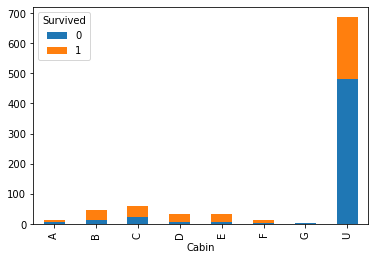

In [635]:
pd.crosstab(titanic.Cabin[:len_train],train.Survived).plot.bar(stacked=True)

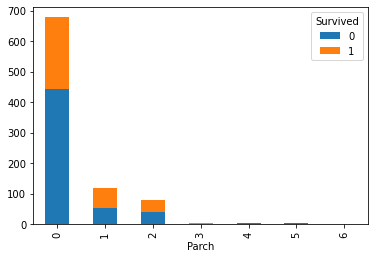

In [636]:
pd.crosstab(titanic.Parch[:len_train],train.Survived).plot.bar(stacked=True)

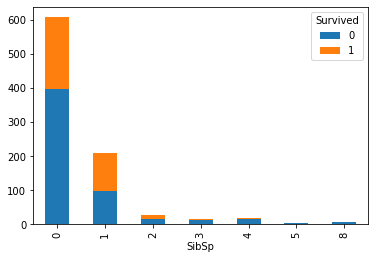

In [637]:
pd.crosstab(titanic.SibSp[:len_train],train.Survived).plot.bar(stacked=True)

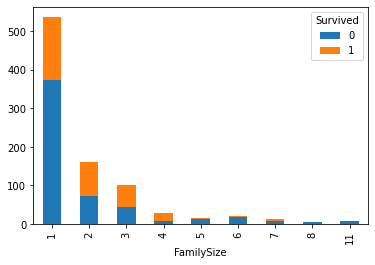

In [638]:
titanic['FamilySize'] = titanic.Parch + titanic.SibSp + 1
pd.crosstab(titanic.FamilySize[:len_train],train.Survived).plot.bar(stacked=True)

In [639]:
titanic = titanic.drop(['SibSp','Parch'],axis=1)

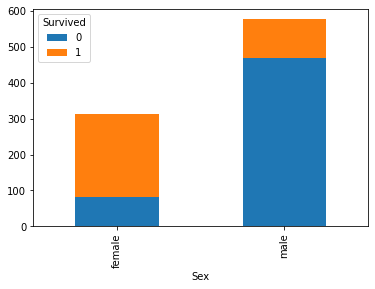

In [640]:
pd.crosstab(titanic.Sex[:len_train],train.Survived).plot.bar(stacked=True)

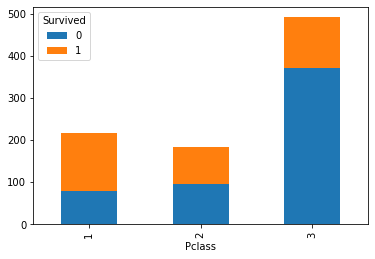

In [641]:
pd.crosstab(titanic.Pclass[:len_train],train.Survived).plot.bar(stacked=True)

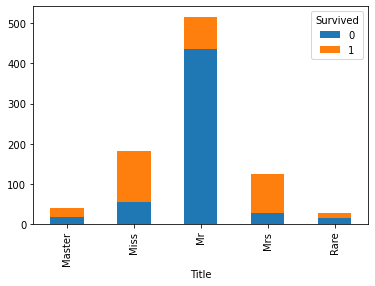

In [642]:
pd.crosstab(titanic.Title[:len_train],train.Survived).plot.bar(stacked=True)

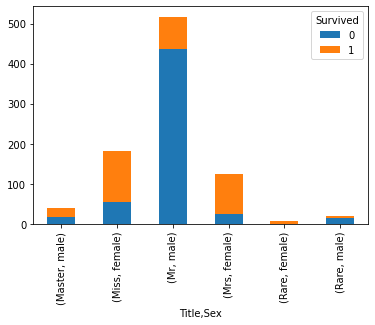

In [643]:
pd.crosstab([titanic.Title[:len_train],titanic.Sex[:len_train]],train.Survived).plot.bar(stacked=True)

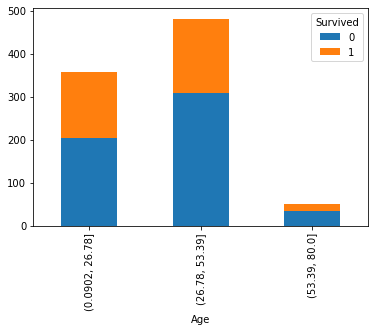

In [644]:
pd.crosstab(pd.cut(titanic.Age,3)[:len_train],train.Survived).plot.bar(stacked=True)

In [645]:
titanic.Age=pd.cut(titanic.Age,3,labels=False)

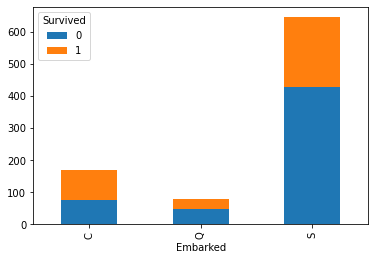

In [646]:
pd.crosstab(titanic.Embarked[:len_train],train.Survived).plot.bar(stacked=True)

In [647]:
titanic=titanic.drop('Name',axis=1)

In [648]:
titanic=titanic.drop('Ticket',axis=1)

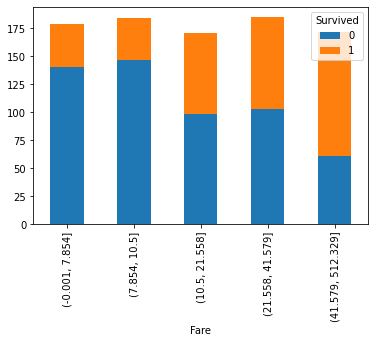

In [649]:
pd.crosstab(pd.qcut(titanic.Fare,5)[:len_train],train.Survived).plot.bar(stacked=True)

In [650]:
titanic.Fare=pd.cut(titanic.Fare,5,labels=False)

In [651]:
titanic=titanic.drop('has_Cabin',axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,male,0,0,U,S,Mr,2
1,2,1.0,1,female,1,0,C,C,Mrs,2
2,3,1.0,3,female,0,0,U,S,Miss,1
3,4,1.0,1,female,1,0,C,S,Mrs,2
4,5,0.0,3,male,1,0,U,S,Mr,1


In [652]:
titanic.Sex=titanic.Sex.map({'male':1,'female':0})
titanic.Cabin=titanic.Cabin.map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'U':7})
titanic.Embarked=titanic.Embarked.map({'C':0,'Q':1,'S':2})
titanic.Title=titanic.Title.map({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Rare':4})

In [653]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,1,0,0,7,2,0,2
1,2,1.0,1,0,1,0,2,0,2,2
2,3,1.0,3,0,0,0,7,2,1,1
3,4,1.0,1,0,1,0,2,2,2,2
4,5,0.0,3,1,1,0,7,2,0,1


In [654]:
train = titanic[:len_train]
test = titanic[len_train:]

In [655]:
X_train=train.loc[:, 'Pclass':]
y_train=train['Survived']
X_test=test.loc[:, 'Pclass':]

In [656]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [531]:
log_reg=LogisticRegression()
log_reg.fit(X_train, y_train)
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [532]:
print(log_reg.score(X_train,y_train))
print(svm_clf.score(X_train,y_train))
print(tree_clf.score(X_train,y_train))
pred = tree_clf.predict(X_test)


0.8103254769921436
0.8305274971941639
0.8810325476992144


In [533]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RF=RandomForestClassifier(random_state=1)
# PRF=[{'n_estimators':[10,100],'max_depth':[3,6],'criterion':['gini','entropy']}]
PRF=[{'n_estimators':[100],'max_depth':[6],'criterion':['gini','entropy']}]
GSRF=GridSearchCV(estimator=RF, param_grid=PRF, scoring='accuracy',cv=2)
scores_rf=cross_val_score(GSRF,X_train,y_train,scoring='accuracy',cv=5)

In [534]:
model=GSRF.fit(X_train, y_train)
pred=model.predict(X_test)
pred = pred.astype(np.int64)
output=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred})
output.to_csv('data/submission.csv', index=False)

In [535]:

print(model.score(X_train,y_train))

0.8507295173961841


In [536]:
official_data = pd.read_csv('data/gender_submission.csv')
my_data = pd.read_csv('data/submission.csv')

In [537]:
# acc = sum(my_data[])
sum(my_data['Survived'][my_data['Survived'] == official_data['Survived']])/ my_data.shape[0]
# sum(pred[pred == official_data['Survived']])/ len(pred)

0.3444976076555024

In [682]:
# xgboost
from xgboost import XGBClassifier
xgb_alg = XGBClassifier(
                        max_depth=10,
                        learning_rate=0.01,
                        n_estimators=2000,
                        silent=True,
                        objective='binary:logistic',
                        nthread=-1,
                        gamma=0,
                        min_child_weight=1,
                        max_delta_step=0,
                        subsample=0.85,
                        colsample_bytree=0.7,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=1,
                        scale_pos_weight=1,
                        seed=1440,
                        missing=None)
xgb_alg.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=1440, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=1440, silent=True,
              subsample=0.85, tree_method=None, validate_parameters=False,
              verbosity=None)

In [683]:
print(xgb_alg.score(X_train,y_train))
xgb_pred = xgb_alg.predict(X_test)
xgb_pred = xgb_pred.astype(np.int64)
xgb_output=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':xgb_pred})
xgb_output.to_csv('data/xgb_submission.csv', index=False)

0.8731762065095399


In [685]:
# 网格搜索
parameters = {
    'max_depth': [5, 10, 15, 20, 25],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
    'n_estimators': [50, 100, 200, 300, 500],
    'min_child_weight': [0, 2, 5, 10, 20],
    'max_delta_step': [0, 0.2, 0.6, 1, 2],
    'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
    'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
    'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]
}
gsearch = GridSearchCV(xgb_alg, param_grid=parameters, scoring='accuracy', cv=3)
xgb_gsearch = gsearch.fit(X_train, y_train)
print(model.score(X_train,y_train))

KeyboardInterrupt: 

In [552]:
official_data = pd.read_csv('data/gender_submission.csv')
my_data = pd.read_csv('data/xgb_submission.csv')
print(official_data)
print(my_data)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
